### Predict the onset of diabetes based on diagnostic measures

` Build a machine learning model using different algorithms to predict whether the patients in the "Pima Indians Diabetes Dataset" have diabetes or not and compare results.`

In [1]:
import pandas as pd 

In [4]:
dirct ='C:/Users/Desktop/multisoft/python/ML_HandsOn_Labs/assignment/diabetes.csv'
sample_data = pd.read_csv(dirct) 

In [187]:
sample_data.head(6)
#sample_data[:,0:8]
sample_data.iloc[0:1,0:8]
sample_data.iloc[0:1,8:9]



,Outcome
0,1


In [188]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
import seaborn as sns

feature_col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_col=['Outcome']
X_data=sample_data[feature_col]
target_var=sample_data[target_col]


X_train, X_test, y_train, y_test = train_test_split(X_data, target_var, test_size=0.33,random_state=0)

#sample_data.count()  # 768 rows
#X_train.count()  # 514 rows
#y_train.count()  #514
#X_test.count()  #254 rows
#model2 = LinearSVC()
#model2.fit(X_train[:],y_train[:])

X_train.shape  #(514, 8)
y_train.shape  #(514, 8)
#X_train[feature_col]
#np.array[[y_train]]
#y_train = np.asarray(y_train)
#X_train=np.asarray(X_train)
#y_train.shape

(514, 1)

In [189]:
model3 = LinearSVC()
model3.fit(X_train,np.ravel(y_train))



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [190]:
result3 = model3.predict(X_test)

In [191]:
model3.score(X_test,y_test)

0.6889763779527559

In [192]:
#logistic regresiion assumption

In [193]:
#check missing value
#you can find just the columns that have NaN values if true:
X_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

In [195]:
#X_data.describe()
print(X_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None


0    500
1    268
Name: Outcome, dtype: int64


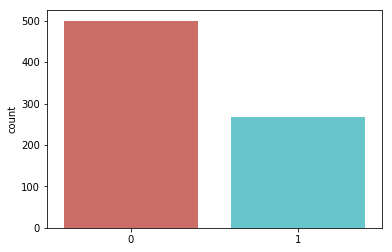

In [196]:
print(target_var['Outcome'].value_counts())
sns.countplot(x=np.ravel(target_var),data=X_data, palette='hls')
plt.show()

In [197]:
#34% 1 64% 0
sample_data.groupby(target_col).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegres = LogisticRegression()
logisticRegres.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
z = logisticRegres.predict(X_test)
print(z)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1]


In [180]:
# Use score method to find out accuracy of model.
accuracyScore = logisticRegres.score(X_test,y_test)
print(accuracyScore)

0.7913385826771654


In [181]:
confusion_matrix = metrics.confusion_matrix(y_test, z)
print(confusion_matrix)

[[156  14]
 [ 39  45]]


In [182]:
from sklearn.metrics import classification_report

print(classification_report(y_test, z))

             precision    recall  f1-score   support

          0       0.80      0.92      0.85       170
          1       0.76      0.54      0.63        84

avg / total       0.79      0.79      0.78       254



FPR: 0.0 , 0.08235294117647059 , 1.0
TPR 0.0 , 0.5357142857142857 , 1.0
thresholds [2 1 0]


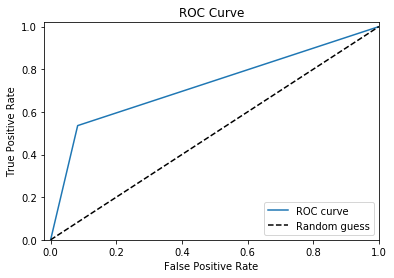

In [183]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, z)
print("FPR:",fpr[0],",",fpr[1],",",fpr[2])
print("TPR",tpr[0],",",tpr[1],",",tpr[2])
print("thresholds",thresholds)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()

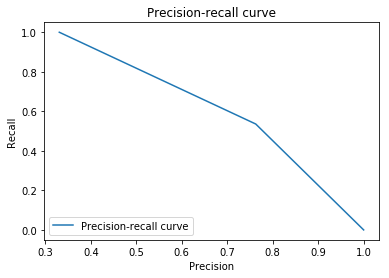

In [184]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, z)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

In [186]:
print("Accuracy:",metrics.accuracy_score(y_test, z))
print("Precision:",metrics.precision_score(y_test, z))
print("Recall:",metrics.recall_score(y_test, z))

#Precision:Logistic Regression model predicted patients are going to suffer from diabetes, 
#accurately 76% of the time.

#Recall: If there are patients who have diabetes in the test set 
#and your Logistic Regression model can identify it 53% of the time.

#Accuracy is 79.13%

Accuracy: 0.7913385826771654
Precision: 0.7627118644067796
Recall: 0.5357142857142857
